<a href="https://colab.research.google.com/github/sarthakchauhan0/CIFAR10-Analysis/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#Best model with best accuracy final v2 very final

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('Shape of Training set :', X_train.shape)
print('Shape of Test set :', X_test.shape)
# Convert the labels to one-hot encoded format
num_classes = 10
np.random.seed(42)
#Data Normalisation
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 64
epochs = 50
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

# Evaluate the model on the test set
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Evaluate the model on the train set
train_score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', train_score[1])

Shape of Training set : (50000, 32, 32, 3)
Shape of Test set : (10000, 32, 32, 3)
Epoch 1/50
782/782 [==============================] - 16s 19ms/step - loss: 1.5215 - accuracy: 0.4843 - val_loss: 1.1461 - val_accuracy: 0.6032
Epoch 2/50
782/782 [==============================] - 13s 17ms/step - loss: 0.9665 - accuracy: 0.6611 - val_loss: 0.8756 - val_accuracy: 0.6989
Epoch 3/50
782/782 [==============================] - 14s 18ms/step - loss: 0.7896 - accuracy: 0.7244 - val_loss: 0.7518 - val_accuracy: 0.7444
Epoch 4/50
782/782 [==============================] - 14s 18ms/step - loss: 0.6859 - accuracy: 0.7642 - val_loss: 0.6337 - val_accuracy: 0.7813
Epoch 5/50
782/782 [==============================] - 13s 17ms/step - loss: 0.5983 - accuracy: 0.7957 - val_loss: 0.5736 - val_accuracy: 0.8013
Epoch 6/50
782/782 [==============================] - 13s 17ms/step - loss: 0.5365 - accuracy: 0.8180 - val_loss: 0.5882 - val_accuracy: 0.8049
Epoch 7/50
782/782 [==============================] - 

4/4 [==============================] - 0s 4ms/step


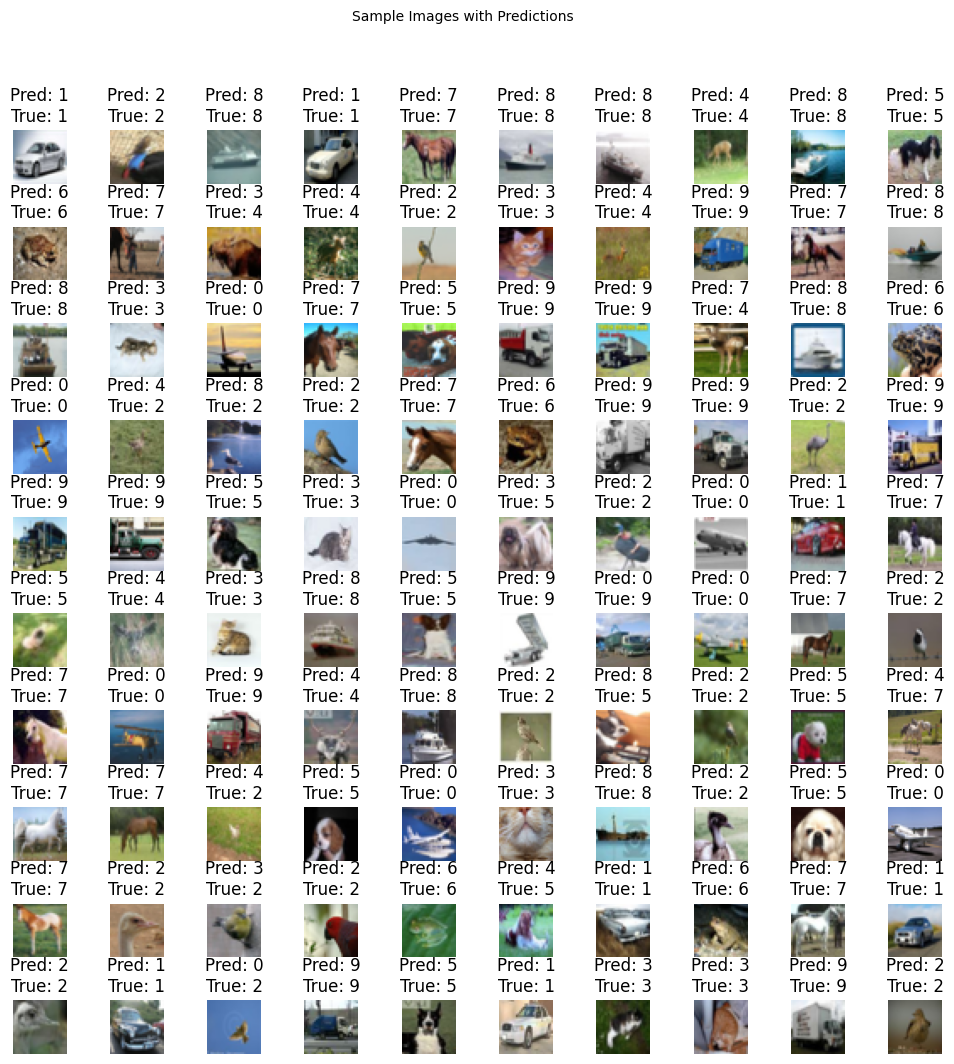

In [18]:
# Sample of predictions vs actual results made by our model. 
import matplotlib.pyplot as plt

# Get a random sample of 100 images from the test set
sample_indices = np.random.choice(np.arange(len(X_test)), size=100, replace=False)
sample_images = X_test[sample_indices]
sample_labels = y_test[sample_indices]

# Make predictions on the sample images
y_pred = model.predict(sample_images)
y_pred_classes = np.argmax(y_pred, axis=1)

# Create a 10x10 grid of subplots
fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(12, 12))
fig.suptitle('Sample Images with Predictions', fontsize=10)
fig.subplots_adjust(hspace=0.8, wspace=0.8)

# Populate the grid with images and their predicted labels
for i in range(10):
    for j in range(10):
        idx = i * 10 + j
        ax[i, j].imshow(sample_images[idx])
        ax[i, j].axis('off')
        predicted_label = y_pred_classes[idx]
        true_label = np.argmax(sample_labels[idx])
        ax[i, j].set_title(f'Pred: {predicted_label}\nTrue: {true_label}')
        
plt.show()

In [10]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Get the predicted labels for the test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Get the true labels for the test set
y_true = np.argmax(y_test, axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
print(cm)

313/313 [==============================] - 1s 3ms/step
[[894  11  17  13  10   3   7  10  23  12]
 [  7 939   2   3   2   1   3   0   7  36]
 [ 34   2 792  46  39  36  30  18   2   1]
 [ 10   1  32 763  28 117  23  17   5   4]
 [  6   0  33  34 840  32  23  30   2   0]
 [  8   1  18  96  18 830  11  15   1   2]
 [  2   1  25  51  11  17 889   2   1   1]
 [  6   0  11  23  17  26   3 909   1   4]
 [ 32  14   4  12   0   5   6   3 913  11]
 [ 13  46   6   5   1   6   1   2  12 908]]


In [11]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_8 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      